In [785]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

vgames = pd.read_csv('vgames2.csv')
vgames.info()

#전체적으로 결측치와 데이터 타입을 확인

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   16598 non-null  int64  
 1   Name         16598 non-null  object 
 2   Platform     16598 non-null  object 
 3   Year         16327 non-null  float64
 4   Genre        16548 non-null  object 
 5   Publisher    16540 non-null  object 
 6   NA_Sales     16598 non-null  object 
 7   EU_Sales     16598 non-null  object 
 8   JP_Sales     16598 non-null  object 
 9   Other_Sales  16598 non-null  object 
dtypes: float64(1), int64(1), object(8)
memory usage: 1.3+ MB


In [786]:
vgames['Platform'] = vgames['Platform'].replace('2600', 'Atarti 2600')
vgames['Genre'] = vgames['Genre'].replace('Role-Playing', 'Role_Playing')
vgames['Platform'] = vgames['Platform'].replace('PSV', 'PS_vita')
#회사이름에 2600이라는 항목이 있어 조사해보니 Atari 2600이라는 게임회사의 게임이라는것이 밝혀져 2600이라는 이름을 Atarti 2600으로 변경

In [787]:
vgames.drop(['Unnamed: 0'], axis = 1, inplace=True)
vgames = vgames.reset_index(drop=True)
#인덱스를 의미하는 언네임 column 제거

In [788]:
vgames.loc[31, 'Year'] = 2007
vgames.loc[2130, 'Year'] = 2006
vgames.loc[3031, 'Year'] = 1997
vgames.loc[3347, 'Year'] = 2008
vgames.loc[3562, 'Year'] = 2005
vgames.loc[3942, 'Year'] = 1999
vgames.loc[4181, 'Year'] = 2008
vgames.loc[5674, 'Year'] = 2022
vgames.loc[5720, 'Year'] = 1982
vgames.loc[6949, 'Year'] = 2003
vgames.loc[8529, 'Year'] = 2008
vgames.loc[9240, 'Year'] = 2011
vgames.loc[9958, 'Year'] = 2008
vgames.loc[10776, 'Year'] = 2007
vgames.loc[10965, 'Year'] = 2003
vgames.loc[11309, 'Year'] = 1988
vgames.loc[12858, 'Year'] = 2007
vgames.loc[12986, 'Year'] = 2010
vgames.loc[13327, 'Year'] = 2001
vgames.loc[13752, 'Year'] = 2002
vgames.loc[14765, 'Year'] = 1977
vgames.loc[16275, 'Year'] = 1978
vgames.loc[3562, 'Publisher'] = 'THQ'
vgames.loc[11309, 'Publisher'] = 'EA Sports'
vgames.loc[13752, 'Publisher'] = 'Electronic Arts'
vgames.loc[15368, 'Publisher'] = 'Majesco'
#결측치가 있는 데이터들 중 sales가 합쳐서 백만이 넘는 의미있는 데이터들은 결측치를 조사해서 대체

In [789]:
vgames = vgames.dropna(subset=['Year'])
vgames = vgames.dropna(subset=['Genre'])
vgames = vgames.dropna(subset=['Publisher'])
vgames['Year'] = vgames['Year'].astype(int)
#결측치가 있는 column에서 결측치 삭제
#Year column이 float형임. 용량과 처리속도를 위해 int형으로 바꿨음.

In [790]:
vgames['NA_Sales'] = vgames['NA_Sales'].map(lambda x:x.replace('M', ''))
vgames['EU_Sales'] = vgames['EU_Sales'].map(lambda x:x.replace('M', ''))
vgames['JP_Sales'] = vgames['JP_Sales'].map(lambda x:x.replace('M', ''))
vgames['Other_Sales'] = vgames['Other_Sales'].map(lambda x:x.replace('M', ''))
#M값은 생략이 가능하므로 지웠음

In [791]:
vgames['NA_Sales'] =vgames['NA_Sales'].map(lambda x: int(x.replace('K',""))*0.001 if 'K' in x else x)
vgames['EU_Sales'] =vgames['EU_Sales'].map(lambda x: int(x.replace('K',""))*0.001 if 'K' in x else x)
vgames['JP_Sales'] =vgames['JP_Sales'].map(lambda x: int(x.replace('K',""))*0.001 if 'K' in x else x)
vgames['Other_Sales'] =vgames['Other_Sales'].map(lambda x: int(x.replace('K',""))*0.001 if 'K' in x else x)
#K를 M단위에 맞춰주기 위해 0.001.곱해주기

In [792]:
vgames = vgames.astype({'NA_Sales':'float', 'EU_Sales':'float', 'JP_Sales':'float', 'Other_Sales':'float'})
#계산을 위해 float형으로 sales 열들을 변경

In [793]:
vgames['Total_Sales'] = vgames['NA_Sales'] + vgames['EU_Sales'] + vgames['JP_Sales'] + vgames['Other_Sales']
#지역별 판매량이 아닌 전체 판매량을 확인하기 위한 feature engineering

In [794]:
vgames

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
0,Candace Kane's Candy Factory,DS,2008,Action,Destineer,0.04,0.00,0.00,0.00,0.04
1,The Munchables,Wii,2009,Action,Namco Bandai Games,0.17,0.00,0.00,0.01,0.18
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0.00,0.00,0.02,0.00,0.02
3,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,0.04,0.00,0.00,0.00,0.04
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,0.12,0.09,0.00,0.04,0.25
...,...,...,...,...,...,...,...,...,...,...
16593,Ice Age 2: The Meltdown,GC,2006,Platform,Vivendi Games,0.15,0.04,0.00,0.01,0.20
16594,Rainbow Islands: Revolution,PSP,2005,Action,Rising Star Games,0.01,0.00,0.00,0.00,0.01
16595,NBA 2K16,PS3,2015,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13,0.79
16596,Toukiden: The Age of Demons,PS_vita,2013,Action,Tecmo Koei,0.05,0.05,0.25,0.03,0.38


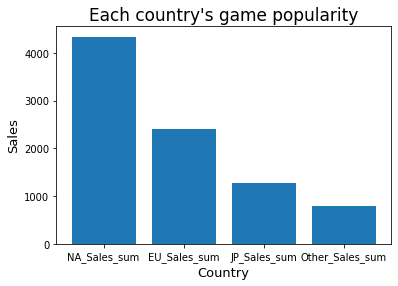

In [795]:
NA_Sales_sum = vgames.NA_Sales.sum()
EU_Sales_sum = vgames.EU_Sales.sum()
JP_Sales_sum = vgames.JP_Sales.sum()
Other_Sales_sum = vgames.Other_Sales.sum()

each_sales = [NA_Sales_sum, EU_Sales_sum, JP_Sales_sum, Other_Sales_sum]
label = ['NA_Sales_sum', 'EU_Sales_sum', 'JP_Sales_sum', 'Other_Sales_sum']
index = np.arange(len(label))

plt.bar(index, each_sales)
plt.title("Each country's game popularity", fontsize=17)
plt.xlabel('Country', fontsize=13)
plt.ylabel('Sales', fontsize=13)
plt.xticks(index, label, fontsize=10)
plt.show()

#지역별 게임 매출로 알아본 지역별 게임에 대한 관심도 (시기 고려 X)

In [796]:
NA_Sales_Genre_sum = vgames.groupby('Genre').NA_Sales.sum()
EU_Sales_Genre_sum = vgames.groupby('Genre').EU_Sales.sum()
JP_Sales_Genre_sum = vgames.groupby('Genre').JP_Sales.sum()
Other_Sales_Genre_sum = vgames.groupby('Genre').Other_Sales.sum()
Total_Sales_Genre_sum = vgames.groupby('Genre').Total_Sales.sum()
#나라마다 장르별 매출

In [797]:
NA_Sales_Genre_sum

Genre
Action          865.99
Adventure       105.15
Fighting        221.92
Misc            400.58
Platform        446.06
Puzzle          121.58
Racing          355.30
Role_Playing    318.76
Shooter         578.61
Simulation      181.43
Sports          672.92
Strategy         67.83
Name: NA_Sales, dtype: float64

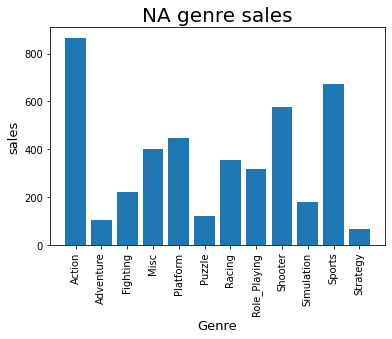

In [798]:
label = ['Action', 'Adventure', 'Fighting', 'Misc', 'Platform', 'Puzzle', 'Racing', 'Role_Playing', 'Shooter', 'Simulation', 'Sports', 'Strategy']
index = np.arange(len(label))

plt.bar(index, NA_Sales_Genre_sum)
plt.title('NA genre sales', fontsize=20)
plt.xlabel('Genre', fontsize=13)
plt.ylabel('sales', fontsize=13)
plt.xticks(index, label,rotation=90, fontsize=10)
plt.show()

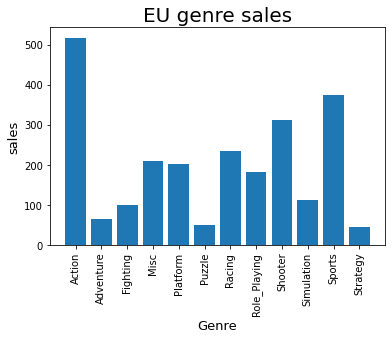

In [799]:
label = ['Action', 'Adventure', 'Fighting', 'Misc', 'Platform', 'Puzzle', 'Racing', 'Role_Playing', 'Shooter', 'Simulation', 'Sports', 'Strategy']
index = np.arange(len(label))

plt.bar(index, EU_Sales_Genre_sum)
plt.title('EU genre sales', fontsize=20)
plt.xlabel('Genre', fontsize=13)
plt.ylabel('sales', fontsize=13)
plt.xticks(index, label,rotation=90, fontsize=10)
plt.show()

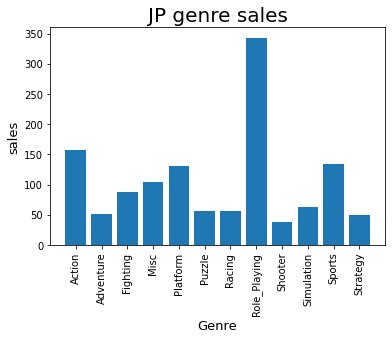

In [800]:
label = ['Action', 'Adventure', 'Fighting', 'Misc', 'Platform', 'Puzzle', 'Racing', 'Role_Playing', 'Shooter', 'Simulation', 'Sports', 'Strategy']
index = np.arange(len(label))

plt.bar(index, JP_Sales_Genre_sum)
plt.title('JP genre sales', fontsize=20)
plt.xlabel('Genre', fontsize=13)
plt.ylabel('sales', fontsize=13)
plt.xticks(index, label,rotation=90, fontsize=10)
plt.show()

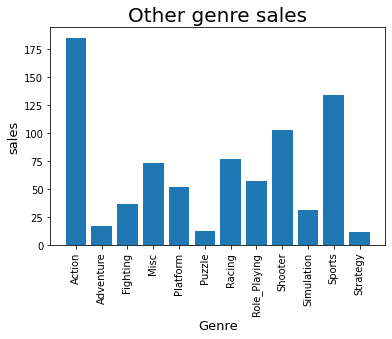

In [801]:
label = ['Action', 'Adventure', 'Fighting', 'Misc', 'Platform', 'Puzzle', 'Racing', 'Role_Playing', 'Shooter', 'Simulation', 'Sports', 'Strategy']
index = np.arange(len(label))

plt.bar(index, Other_Sales_Genre_sum)
plt.title('Other genre sales', fontsize=20)
plt.xlabel('Genre', fontsize=13)
plt.ylabel('sales', fontsize=13)
plt.xticks(index, label,rotation=90, fontsize=10)
plt.show()

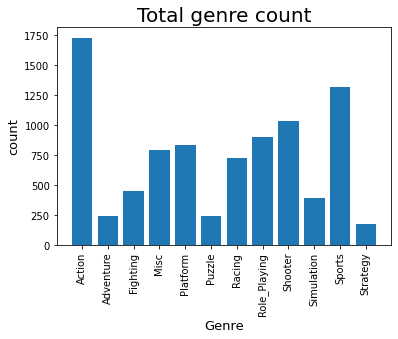

In [802]:
label = ['Action', 'Adventure', 'Fighting', 'Misc', 'Platform', 'Puzzle', 'Racing', 'Role_Playing', 'Shooter', 'Simulation', 'Sports', 'Strategy']
index = np.arange(len(label))

plt.bar(index, Total_Sales_Genre_sum)
plt.title('Total genre count', fontsize=20)
plt.xlabel('Genre', fontsize=13)
plt.ylabel('count', fontsize=13)
plt.xticks(index, label,rotation=90, fontsize=10)
plt.show()

In [803]:
Action_game_Sales = vgames[(vgames.Genre == 'Action')]
Action_per = Action_game_Sales.Total_Sales.sum() / len(vgames.loc[vgames['Genre'] == 'Action']) 
Action_per = round(Action_per, 2)

Adventure_game_Sales = vgames[(vgames.Genre == 'Adventure')]
Adventure_per = Adventure_game_Sales.Total_Sales.sum() / len(vgames.loc[vgames['Genre'] == 'Adventure']) 
Adventure_per = round(Adventure_per, 2)

Fighting_game_Sales = vgames[(vgames.Genre == 'Fighting')]
Fighting_per = Fighting_game_Sales.Total_Sales.sum() / len(vgames.loc[vgames['Genre'] == 'Fighting']) 
Fighting_per = round(Fighting_per, 2)

Misc_game_Sales = vgames[(vgames.Genre == 'Misc')]
Misc_per = Misc_game_Sales.Total_Sales.sum() / len(vgames.loc[vgames['Genre'] == 'Misc']) 
Misc_per = round(Misc_per, 2)

Platform_game_Sales = vgames[(vgames.Genre == 'Platform')]
Platform_per = Platform_game_Sales.Total_Sales.sum() / len(vgames.loc[vgames['Genre'] == 'Platform']) 
Platform_per = round(Platform_per, 2)

Puzzle_game_Sales = vgames[(vgames.Genre == 'Puzzle')]
Puzzle_per = Puzzle_game_Sales.Total_Sales.sum() / len(vgames.loc[vgames['Genre'] == 'Puzzle']) 
Puzzle_per = round(Puzzle_per, 2)

Racing_game_Sales = vgames[(vgames.Genre == 'Racing')]
Racing_per = Racing_game_Sales.Total_Sales.sum() / len(vgames.loc[vgames['Genre'] == 'Racing']) 
Racing_per = round(Racing_per, 2)

Shooter_game_Sales = vgames[(vgames.Genre == 'Shooter')]
Shooter_per = Shooter_game_Sales.Total_Sales.sum() / len(vgames.loc[vgames['Genre'] == 'Shooter']) 
Shooter_per = round(Shooter_per, 2)

Simulation_game_Sales = vgames[(vgames.Genre == 'Simulation')]
Simulation_per = Simulation_game_Sales.Total_Sales.sum() / len(vgames.loc[vgames['Genre'] == 'Simulation']) 
Simulation_per = round(Simulation_per, 2)

Sports_game_Sales = vgames[(vgames.Genre == 'Sports')]
Sports_per = Sports_game_Sales.Total_Sales.sum() / len(vgames.loc[vgames['Genre'] == 'Sports']) 
Sports_per = round(Sports_per, 2)

StratedygameSales = vgames[(vgames.Genre == 'Strategy')]
Stratedyper = StratedygameSales.Total_Sales.sum() / len(vgames.loc[vgames['Genre'] == 'Strategy']) 
Stratedyper = round(Stratedyper, 2)

Role_Playing_game_Sales = vgames[(vgames.Genre == 'Role_Playing')]
Role_Playing_per = Role_Playing_game_Sales.Total_Sales.sum() / len(vgames.loc[vgames['Genre'] == 'Role_Playing']) 
Role_Playing_per = round(Role_Playing_per, 2)
#게임당 매출을 구하기 위해 함수 생성

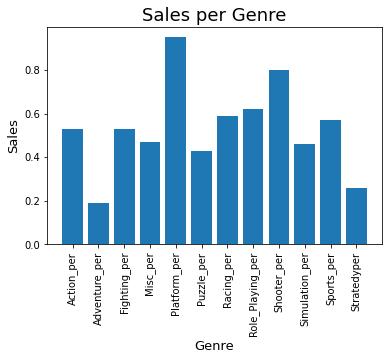

In [804]:
label = ['Action_per', 'Adventure_per', 'Fighting_per', 'Misc_per', 'Platform_per', 'Puzzle_per', 'Racing_per', 'Role_Playing_per', 'Shooter_per', 'Simulation_per', 'Sports_per', 'Stratedyper']
index = np.arange(len(label))

plt.bar(index, [Action_per, Adventure_per, Fighting_per, Misc_per, Platform_per, Puzzle_per, Racing_per, Role_Playing_per, Shooter_per, Simulation_per, Sports_per, Stratedyper])
plt.title('Sales per Genre', fontsize=18)
plt.xlabel('Genre', fontsize=13)
plt.ylabel('Sales', fontsize=13)
plt.xticks(index, label,rotation=90, fontsize=10)
plt.show()
#평균적으로 장르당 게임내면 나오는 매출

In [805]:
vgames['Year'] =vgames['Year'].map(lambda x: x + 2000 if x < 20 else (x + 1900 if x >= 20 and x < 100 else x))
#10의 자리만 표시한 Year column에 대해 적절한 값 대입

In [806]:
bins = [1970, 1980, 1990, 2000, 2010, 2020]
labels = ['70s', '80s', '90s', '00s', '10s']
vgames['Years'] = pd.cut(x=vgames['Year'], bins=bins, labels=labels)
#10년 단위로 끊어서 시기별 트렌드를 조사하기 위해 column 생성

In [807]:
is_Action = vgames['Genre'] == 'Action'
Action_list = vgames[is_Action]
Action_list = Action_list['Years'].value_counts()
Action = Action_list.sort_index().to_list()

is_Adventure = vgames['Genre'] == 'Adventure'
Adventure_list = vgames[is_Adventure]
Adventure_list = Adventure_list['Years'].value_counts()
Adventure = Adventure_list.sort_index().to_list()

is_Fighting = vgames['Genre'] == 'Fighting'
Fighting_list = vgames[is_Fighting]
Fighting_list = Fighting_list['Years'].value_counts()
Fighting = Fighting_list.sort_index().to_list()

is_Misc = vgames['Genre'] == 'Misc'
Misc_list = vgames[is_Misc]
Misc_list = Misc_list['Years'].value_counts()
Misc = Misc_list.sort_index().to_list()

is_Platform = vgames['Genre'] == 'Platform'
Platform_list = vgames[is_Platform]
Platform_list = Platform_list['Years'].value_counts()
Platform = Platform_list.sort_index().to_list()

is_Puzzle = vgames['Genre'] == 'Puzzle'
Puzzle_list = vgames[is_Puzzle]
Puzzle_list = Puzzle_list['Years'].value_counts()
Puzzle = Puzzle_list.sort_index().to_list()

is_Racing = vgames['Genre'] == 'Racing'
Racing_list = vgames[is_Racing]
Racing_list = Racing_list['Years'].value_counts()
Racing = Racing_list.sort_index().to_list()

is_Role_Playing = vgames['Genre'] == 'Role_Playing'
Role_Playing_list = vgames[is_Role_Playing]
Role_Playing_list = Role_Playing_list['Years'].value_counts()
RPG = Role_Playing_list.sort_index().to_list()

is_Shooter = vgames['Genre'] == 'Shooter'
Shooter_list = vgames[is_Shooter]
Shooter_list = Shooter_list['Years'].value_counts()
Shooter = Shooter_list.sort_index().to_list()

is_Simulation = vgames['Genre'] == 'Simulation'
Simulation_list = vgames[is_Simulation]
Simulation_list = Simulation_list['Years'].value_counts()
Simulation = Simulation_list.sort_index().to_list()

is_Sports = vgames['Genre'] == 'Sports'
Sports_list = vgames[is_Sports]
Sports_list = Sports_list['Years'].value_counts()
Sports = Sports_list.sort_index().to_list()

is_Strategy = vgames['Genre'] == 'Strategy'
Strategy_list = vgames[is_Strategy]
Strategy_list = Strategy_list['Years'].value_counts()
Strategy = Strategy_list.sort_index().to_list()

#시기별 게임 갯수 리스트업

In [808]:
trend_world = pd.DataFrame(data = list(zip(Action, Adventure, Fighting, Misc, Platform, Puzzle, Racing, RPG, Shooter, Simulation, Sports, Strategy)), columns = ['Action', 'Adventure','Fighting', 'Misc', 'Platform', 'Puzzle', 'Racing', 'RPG', 'Shooter', 'Simulation',
                                              'Sports', 'Strategy'])
trend_world = trend_world.T
trend_world.columns = ['70s', '80s', '90s', '00s', '10s']
trend_world['Genre'] = trend_world.index
trend_world

#시기별 게임의 개수 데이터 프레임을 만들어 아래에 시각화

,70s,80s,90s,00s,10s,Genre
Action,2,68,202,1765,1209,Action
Adventure,0,3,113,769,385,Adventure
Fighting,1,3,222,454,156,Fighting
Misc,4,4,135,1182,361,Misc
Platform,0,36,147,572,119,Platform
Puzzle,0,21,81,394,70,Puzzle
Racing,0,10,222,812,176,Racing
RPG,0,11,198,803,453,RPG
Shooter,3,28,157,781,314,Shooter
Simulation,0,4,100,615,127,Simulation


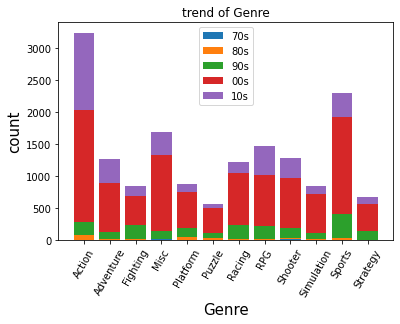

In [809]:
plt.bar(trend_world['Genre'], trend_world['70s'], label = '70s')
plt.bar(trend_world['Genre'], trend_world['80s'], bottom = trend_world['70s'], label = '80s')
plt.bar(trend_world['Genre'], trend_world['90s'], bottom = trend_world['70s'] + trend_world['80s'], label = '90s')
plt.bar(trend_world['Genre'], trend_world['00s'], bottom = trend_world['70s'] + trend_world['80s'] + trend_world['90s'], label = '00s')
plt.bar(trend_world['Genre'], trend_world['10s'], bottom = trend_world['70s'] + trend_world['80s'] + trend_world['90s'] + trend_world['00s'], label = '10s')

plt.title('trend of Genre')
plt.ylabel('count', fontsize = 15)
plt.xlabel('Genre', fontsize = 15)
plt.xticks(rotation = 60)
plt.legend()
#10년 단위로 장르별 게임 출시 개수 시각화

In [810]:
vgames['Platform'].value_counts()
#어떤 플랫폼이 몇개나 있는지 확인

DS             2127
PS2            2126
PS3            1300
Wii            1289
X360           1232
PSP            1194
PS             1187
PC              936
XB              800
GBA             786
GC              541
3DS             498
PS_vita         409
PS4             335
N64             313
SNES            239
XOne            212
SAT             173
WiiU            143
Atarti 2600     118
GB               98
NES              98
DC               52
GEN              27
NG               12
SCD               6
WS                6
3DO               3
TG16              2
GG                1
PCFX              1
Name: Platform, dtype: int64

In [811]:
DS = len(vgames.loc[vgames['Platform'] == 'DS'])
print(DS)
PS2 = len(vgames.loc[vgames['Platform'] == 'PS2'])
print(PS2)
PS3 = len(vgames.loc[vgames['Platform'] == 'PS3'])
print(PS3)
Wii = len(vgames.loc[vgames['Platform'] == 'Wii'])
print(Wii)
X360 = len(vgames.loc[vgames['Platform'] == 'X360'])
print(X360)
PSP = len(vgames.loc[vgames['Platform'] == 'PSP'])
print(PSP)
PS = len(vgames.loc[vgames['Platform'] == 'PS'])
print(PS)
PC = len(vgames.loc[vgames['Platform'] == 'PC'])
print(PC)
XB = len(vgames.loc[vgames['Platform'] == 'XB'])
print(XB)
GBA = len(vgames.loc[vgames['Platform'] == 'GBA'])
print(GBA)
#탑 10 플랫폼이 몇개 팔렸는지 함수로 저장

2127
2126
1300
1289
1232
1194
1187
936
800
786


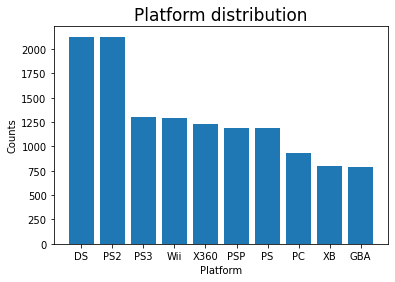

In [812]:
each_plat = [DS, PS2, PS3, Wii, X360, PSP, PS, PC, XB, GBA]
label = ['DS', 'PS2', 'PS3', 'Wii', 'X360', 'PSP', 'PS', 'PC', 'XB', 'GBA']
index = np.arange(len(label))

plt.bar(index, each_plat)
plt.title("Platform distribution", fontsize=17)
plt.xlabel('Platform', fontsize=10)
plt.ylabel('Counts', fontsize=10)
plt.xticks(index, label, fontsize=10)
plt.show()

#게임들의 플랫폼을 확인해서 플랫폼 점유율을 시각화 (시기 고려 X)

In [813]:
is_DS = vgames['Platform'] == 'DS'
DS_list = vgames[is_DS]
DS_list = DS_list['Years'].value_counts()
DS = DS_list.sort_index().to_list()

is_PS2 = vgames['Platform'] == 'PS2'
PS2_list = vgames[is_PS2]
PS2_list = PS2_list['Years'].value_counts()
PS2 = PS2_list.sort_index().to_list()

is_PS3 = vgames['Platform'] == 'PS3'
PS3_list = vgames[is_PS3]
PS3_list = PS3_list['Years'].value_counts()
PS3 = PS3_list.sort_index().to_list()

is_Wii = vgames['Platform'] == 'Wii'
Wii_list = vgames[is_Wii]
Wii_list = Wii_list['Years'].value_counts()
Wii = Wii_list.sort_index().to_list()

is_X360 = vgames['Platform'] == 'X360'
X360_list = vgames[is_X360]
X360_list = X360_list['Years'].value_counts()
X360 = X360_list.sort_index().to_list()

is_PSP = vgames['Platform'] == 'PSP'
PSP_list = vgames[is_PSP]
PSP_list = PSP_list['Years'].value_counts()
PSP = PSP_list.sort_index().to_list()

is_PS = vgames['Platform'] == 'PS'
PS_list = vgames[is_PS]
PS_list = PS_list['Years'].value_counts()
PS = PS_list.sort_index().to_list()

is_PC = vgames['Platform'] == 'PC'
PC_list = vgames[is_PC]
PC_list = PC_list['Years'].value_counts()
PC = PC_list.sort_index().to_list()

is_XB = vgames['Platform'] == 'XB'
XB_list = vgames[is_XB]
XB_list = XB_list['Years'].value_counts()
XB = XB_list.sort_index().to_list()

is_GBA = vgames['Platform'] == 'GBA'
GBA_list = vgames[is_GBA]
GBA_list = GBA_list['Years'].value_counts()
GBA = GBA_list.sort_index().to_list()

is_PS4 = vgames['Platform'] == 'PS4'
PS4_list = vgames[is_PS4]
PS4_list = PS4_list['Years'].value_counts()
PS4 = PS4_list.sort_index().to_list()
#시기별로 플랫폼의 점유율을 구하기 위해 데이터 프레임 생성

In [814]:
trend_plat = pd.DataFrame(data = list(zip(DS, PS2, PS3, Wii, X360, PSP, PS, PC, XB, GBA, PS4)), columns = ['DS', 'PS2', 'PS3', 'Wii', 'X360', 'PSP', 'PS', 'PC', 'XB', 'GBA', 'PS4'])
trend_plat = trend_plat.T
trend_plat.columns = ['70s', '80s', '90s', '00s', '10s']
trend_plat['Platform'] = trend_plat.index
trend_plat

#시기별 게임의 개수 데이터 프레임을 만들어 아래에 시각화

,70s,80s,90s,00s,10s,Platform
DS,0,1,0,1940,186,DS
PS2,0,0,82,2037,7,PS2
PS3,0,0,0,597,703,PS3
Wii,0,0,0,1091,198,Wii
X360,0,0,0,734,498,X360
PSP,0,0,0,883,311,PSP
PS,0,1,1073,113,0,PS
PC,0,2,45,521,368,PC
XB,0,0,1,798,0,XB
GBA,0,0,1,785,0,GBA


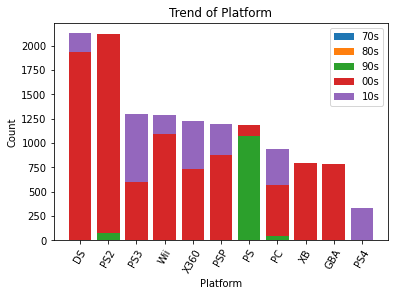

In [815]:
plt.bar(trend_plat['Platform'], trend_plat['70s'], label = '70s')
plt.bar(trend_plat['Platform'], trend_plat['80s'], bottom = trend_plat['70s'], label = '80s')
plt.bar(trend_plat['Platform'], trend_plat['90s'], bottom = trend_plat['70s'] + trend_plat['80s'], label = '90s')
plt.bar(trend_plat['Platform'], trend_plat['00s'], bottom = trend_plat['70s'] + trend_plat['80s'] + trend_plat['90s'], label = '00s')
plt.bar(trend_plat['Platform'], trend_plat['10s'], bottom = trend_plat['70s'] + trend_plat['80s'] + trend_plat['90s'] + trend_plat['00s'], label = '10s')

plt.title('Trend of Platform')
plt.ylabel('Count', fontsize = 10)
plt.xlabel('Platform', fontsize = 10)
plt.xticks(rotation = 60)
plt.legend()
#플랫폼들의 시기별 점유율 변화를 시각화

In [816]:
bins2 = [2010, 2013, 2016, 2022]
labels2 = ['10~', '13~', '16~',]
vgames['Years'] = pd.cut(x=vgames['Year'], bins=bins2, labels=labels2)
#ps3 4 5를 자세히 살펴보기 위해 년도를 더 작게 자름

In [817]:
is_PS3 = vgames['Platform'] == 'PS3'
PS3_list = vgames[is_PS3]
PS3_list = PS3_list['Years'].value_counts()
PS3 = PS3_list.sort_index().to_list()

is_PS4 = vgames['Platform'] == 'PS4'
PS4_list = vgames[is_PS4]
PS4_list = PS4_list['Years'].value_counts()
PS4 = PS4_list.sort_index().to_list()

In [818]:
trend_plat2 = pd.DataFrame(data = list(zip(PS3, PS4)), columns = ['PS3', 'PS4'])
trend_plat2 = trend_plat2.T
trend_plat2.columns = ['10~', '13~', '16~']
#trend_plat2['Platform'] = trend_plat2.index
trend_plat2

,10~,13~,16~
PS3,490,213,0
PS4,16,318,1


In [819]:
# plt.bar(trend_plat2['Platform'], trend_plat2['10~'], label = 'PS3')
# plt.bar(trend_plat2['Platform'], trend_plat2['13~'], bottom = trend_plat2['10~'], label = 'PS4')
# plt.bar(trend_plat2['Platform'], trend_plat2['16~'], bottom = trend_plat2['10~'] + trend_plat2['13~'], label = 'PS5')

# plt.title("play station's trend")
# plt.ylabel('Count', fontsize = 10)
# plt.xlabel('Platform', fontsize = 10)
# plt.xticks(rotation = 60)
# plt.legend()
# #PS들의 시기별 점유율 변화를 자세하게 시각화

In [820]:
find_top = vgames['Genre'] == 'Action'
find_top_action = vgames[find_top]
find_top_action = find_top_action.sort_values('Total_Sales', ascending=False)
find_top_action.head(20)
#액션게임 순위확인

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales,Years
3483,Grand Theft Auto V,PS3,2013,Action,Take-Two Interactive,7.01,9.27,0.97,4.14,21.39,10~
14669,Grand Theft Auto: San Andreas,PS2,2004,Action,Take-Two Interactive,9.43,0.40,0.41,10.57,20.81,NaN
10913,Grand Theft Auto V,X360,2013,Action,Take-Two Interactive,9.63,5.31,0.06,1.38,16.38,10~
5340,Grand Theft Auto: Vice City,PS2,2002,Action,Take-Two Interactive,8.41,5.49,0.47,1.78,16.15,NaN
9786,Grand Theft Auto III,PS2,2001,Action,Take-Two Interactive,6.99,4.51,0.30,1.30,13.10,NaN
2008,Grand Theft Auto V,PS4,2014,Action,Take-Two Interactive,3.80,5.81,0.36,2.02,11.99,13~
4806,Pokemon HeartGold/Pokemon SoulSilver,DS,2009,Action,Nintendo,4.40,2.77,3.96,0.77,11.90,NaN
13926,Grand Theft Auto IV,X360,2008,Action,Take-Two Interactive,6.76,3.10,0.14,1.03,11.03,NaN
16475,Grand Theft Auto IV,PS3,2008,Action,Take-Two Interactive,4.76,3.76,0.44,1.62,10.58,NaN
9035,FIFA Soccer 13,PS3,2012,Action,Electronic Arts,1.06,5.05,0.13,2.01,8.25,10~


In [ ]:
#선정한 게임: GTA5